In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import scipy.stats 
import os
import matplotlib.pylab as pltb
import seaborn as seaborn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

data = pandas.read_csv('gapminder.csv', low_memory=False)

pandas.set_option('display.float_format', lambda x:'%f'%x)

print(len(data))
print(len(data.columns))

print(len(data.index))

213
16
213


### My research question is whether “employment rate” is somehow co-related to the rate of committing “suicide”

- As more and more jobs become automated, one of the major concerns of the youth is finding a job and making a living. Amidst this crisis, we have seen many lost jobs and closed businesses. I wonder what effect this might have on the suicide rates.

In [2]:
data['employrate'] = pandas.to_numeric(data['employrate'],errors='coerce').astype(float)
data['suicideper100th'] = pandas.to_numeric(data['suicideper100th'],errors='coerce').astype(float)
data['femaleemployrate'] = pandas.to_numeric(data['femaleemployrate'],errors='coerce').astype(float)
data['incomeperperson'] = pandas.to_numeric(data['incomeperperson'],errors='coerce').astype(float)

data1=data.copy()
data=data[['employrate','suicideper100th','femaleemployrate','incomeperperson']]

print("Employment rate of countries")
c1 = data['employrate'].value_counts(sort=False)
print(c1)

print("Employment rates in females")
q1 = data['femaleemployrate'].value_counts(sort=False)
print(q1)

print("suicide rate per 100 people of various countries")
p1 = data['suicideper100th'].value_counts(sort=False)
print(p1)

print("Incomes per person")
r1 = data['incomeperperson'].value_counts(sort=False)
print(r1)

print(data)

data=data.replace(0,numpy.nan)

data=data.dropna()

print(data)


Employment rate of countries
employrate
55.700001    1
51.400002    1
50.500000    1
75.699997    1
58.400002    2
            ..
57.500000    2
71.000000    1
32.000000    1
39.000000    1
66.800003    1
Name: count, Length: 139, dtype: int64
Employment rates in females
femaleemployrate
25.600000    1
42.099998    4
31.700001    1
69.400002    1
45.900002    2
            ..
45.799999    1
67.599998    1
11.300000    1
20.299999    1
53.500000    1
Name: count, Length: 153, dtype: int64
suicide rate per 100 people of various countries
suicideper100th
6.684385     1
7.699330     1
4.848770     1
5.362179     1
14.554677    1
            ..
4.119620     1
11.653322    1
6.265789     1
12.019036    1
13.905267    1
Name: count, Length: 191, dtype: int64
Incomes per person
incomeperperson
1914.996551     1
2231.993335     1
21943.339898    1
1381.004268     1
11894.464075    1
               ..
5528.363114     1
722.807559      1
610.357367      1
432.226337      1
320.771890      1
Name:

- 0 represents the countries for which the data was missing which was 35, 35 and 22 for employment rate, female employment rate and suicide rates respectively.

- Since we had different percentage counts for every country, the frequency for each is 1 or 2. 

- Further grouping will organize the data better.

In [3]:
data['empgrp5']=pandas.qcut(data.employrate,4, labels=["1=25%tile","2=50%tile","3=75%tile","4=100%tile"])
print(pandas.crosstab(data['empgrp5'],data['employrate']))

data['suigrp5']=pandas.qcut(data.suicideper100th,4, labels=["1=25%tile","2=50%tile","3=75%tile","4=100%tile"])
print(pandas.crosstab(data['suigrp5'],data['suicideper100th']))


data['fempgrp5']=pandas.cut(data.femaleemployrate, [0,25,50,75,100])
print(pandas.crosstab(data['fempgrp5'],data['femaleemployrate']))

data['ippgrp5']=pandas.qcut(data.incomeperperson,4, labels=["1=25%tile","2=50%tile","3=75%tile","4=100%tile"])
print(pandas.crosstab(data['ippgrp5'],data['incomeperperson']))

print("\n Employment rate of countries managed into 4 groups")
c2 = data['empgrp5'].value_counts(sort=False)
print(c2)

print("\n Employment rates in females managed into 4 groups")
q2 = data['fempgrp5'].value_counts(sort=False)
print(q2)

print("\n suicide rate per 100 people of various countries managed into 4 groups")
p2 = data['suigrp5'].value_counts(sort=False,dropna=True)
print(p2)

print("\n Income people of various countries managed into 4 groups")
r2 = data['ippgrp5'].value_counts(sort=False,dropna=True)
print(p2)

desc1=data['employrate'].describe()
print(desc1)
desc2=data['suicideper100th'].describe()
print(desc2)
desc3=data['femaleemployrate'].describe()
print(desc3)
desc4=data['incomeperperson'].describe()
print(desc4)

employrate  34.900002  37.400002  38.900002  39.000000  40.099998  41.099998  \
empgrp5                                                                        
1=25%tile           1          1          1          1          1          1   
2=50%tile           0          0          0          0          0          0   
3=75%tile           0          0          0          0          0          0   
4=100%tile          0          0          0          0          0          0   

employrate  41.200001  41.599998  42.000000  42.400002  ...  76.000000  \
empgrp5                                                 ...              
1=25%tile           1          1          1          1  ...          0   
2=50%tile           0          0          0          0  ...          0   
3=75%tile           0          0          0          0  ...          0   
4=100%tile          0          0          0          0  ...          1   

employrate  77.000000  78.199997  78.900002  79.800003  80.699997  81.3000

There was a ton of missing data which I replaced with NaN value. Then in lines 42 and 43, i used .loc() function to remove the values of variables for which one of the variables was missing.

- After this, my 3 variables Employment rate, female employment rate and suicide rate were all grouped into groups of 4.

- Employment rate was grouped into 4 groups of 25% each, it was found that most countries have their employment rates between 50 and 75% and that none of the countries have their employment rates below 25%.

- Female employment rate was grouped into 4 groups of 25% each, it was found that most countries have their employment rates between 25 and 50% and a decent amount of countries had these values dropping below 25%.

- Suicide per 100th was grouped into 4 groups according to percentile values because values were relatively low.

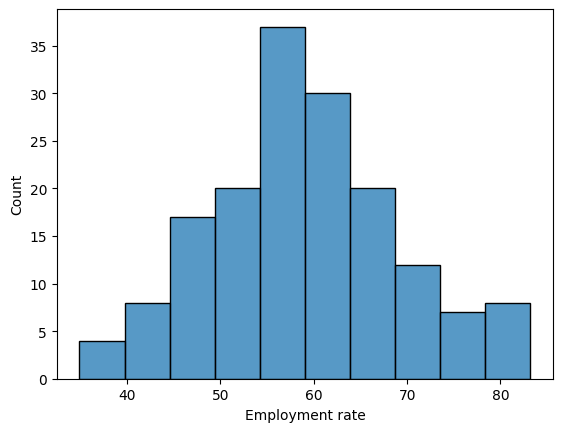

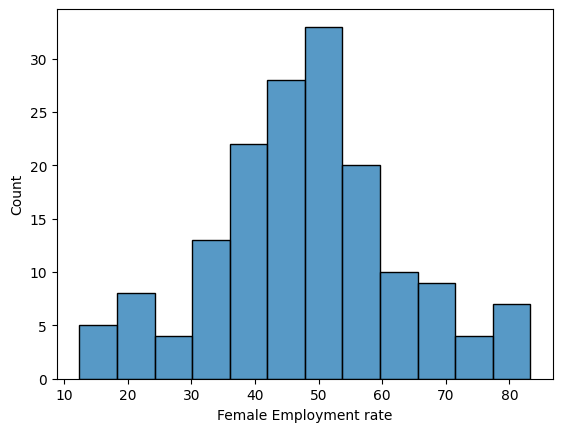

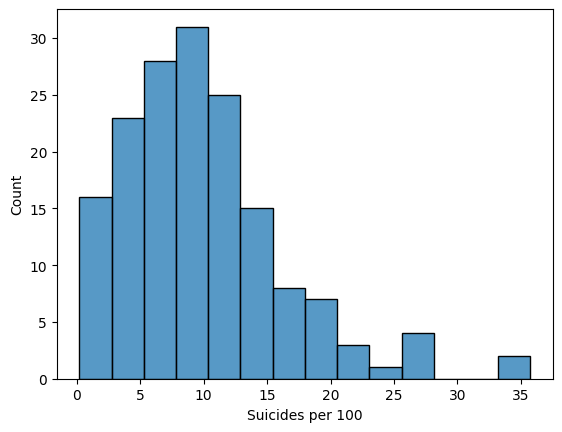

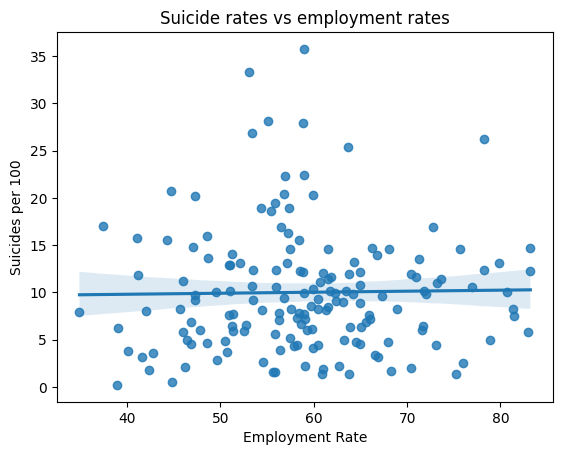

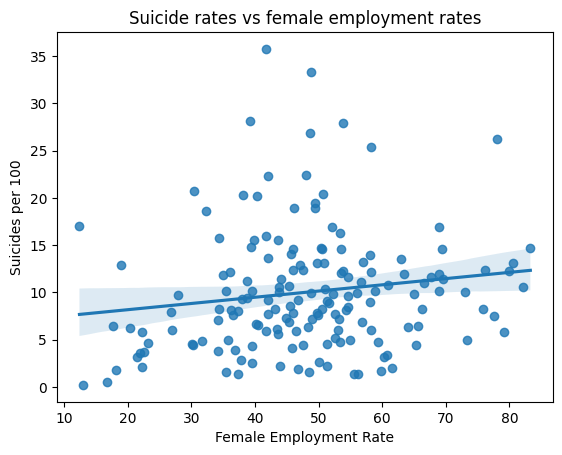

In [4]:
seaborn.histplot(data['employrate'].dropna(),kde=False)
plt.xlabel('Employment rate')
plt.show()

seaborn.histplot(data['femaleemployrate'].dropna(),kde=False)
plt.xlabel('Female Employment rate')
plt.show()

seaborn.histplot(data['suicideper100th'].dropna(),kde=False)
plt.xlabel('Suicides per 100')
plt.show()

seaborn.regplot(x="employrate",y="suicideper100th",data=data)
plt.xlabel('Employment Rate')
plt.ylabel('Suicides per 100')
plt.title('Suicide rates vs employment rates')
plt.show()

seaborn.regplot(x="femaleemployrate",y="suicideper100th",data=data)
plt.xlabel('Female Employment Rate')
plt.ylabel('Suicides per 100')
plt.title('Suicide rates vs female employment rates')
plt.show()

Univariant graph summary:

- Employment rates showed a    unimodal graph with mean of 59.18 with range varying from 34.9 to 83.2.
- Female employment rates showed a unimodal graph with mean of 47.5 with range varying from 11.3 to 83.3.
- Suicide per 100th showed a skewed right graph with mean of   of 47.5 with range varying from 0.2 to 35.74.

Bivariant graph summary:

- As we can clearly see that the relation between these variable is inconclusive. Female employment rates and suicide rates show a slight positive relation while employment rates and suicide rates seem to have no proper relation apart from being concentrated towards the middle values.

In [5]:
c3=data.groupby('empgrp5').size()
print(c3)

sub1 = data[['suicideper100th', 'empgrp5']]



model1 = smf.ols(formula='suicideper100th ~ C(empgrp5)', data=sub1)
results1 = model1.fit()
print (results1.summary())

print ("means for Suuicide rate by Employment rate \n ")
m2= sub1.groupby('empgrp5').mean()
print (m2)

print ("standard deviations for Suicide rate by Employment rate \n")
sd2 = sub1.groupby('empgrp5').std()
print (sd2)

print("suicide rate per 100 people of various countries")
p1 = sub1['empgrp5']
print(p1)

mc1=multi.MultiComparison(sub1['suicideper100th'], sub1['empgrp5'])
res1=mc1.tukeyhsd()
print(res1.summary())

empgrp5
1=25%tile     41
2=50%tile     41
3=75%tile     42
4=100%tile    39
dtype: int64
                            OLS Regression Results                            
Dep. Variable:        suicideper100th   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     2.844
Date:                Sat, 06 Jan 2024   Prob (F-statistic):             0.0395
Time:                        20:16:35   Log-Likelihood:                -528.73
No. Observations:                 163   AIC:                             1065.
Df Residuals:                     159   BIC:                             1078.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

- Mean values of suicide per 100th is least (4.8) for lowest 25%tile countries while being relatively higher (around 9-11) for the other 3 sub groups..

- P value is less than 0.05 for 3 cases which means that clearly there is certain correlation between income levels and suicide rate.

- We can accept the alternate hypothesis in case of lowest 25% employment rate countries. 

- Since the mean for this is very low, our alternate hypothesis states that “The lowest 25% employment countries show significantly less suicides than higher employment rate countries.”

In [6]:

suimax=data['suicideper100th'].max()
suimean=data['suicideper100th'].mean()
data['suigrp2']=pandas.cut(data.suicideper100th, [0,suimean,suimax],labels=["less than world average","more than world average"])
print(pandas.crosstab(data['suigrp2'],data['suicideper100th']))

# contingency table of observed counts
ct1=pandas.crosstab(data['suigrp2'], data['empgrp5'])
print (ct1)

# column percentages
colsum=ct1.sum(axis=0)
colpct=ct1/colsum
print(colpct)

# chi-square
print ('chi-square value, p value, expected counts')
cs1= scipy.stats.chi2_contingency(ct1)
print (cs1)

# chi-square
print ('chi-square value, p value, expected counts')
cs1= scipy.stats.chi2_contingency(ct1)
print (cs1)

print('\n\n')

recode2 = {"1=25%tile":"1=25%tile", "2=50%tile": "2=50%tile"}
data['COMP1v2']=  data['empgrp5'].map(recode2)

# contingency table of observed counts
ct2=pandas.crosstab(data['suigrp2'], data['COMP1v2'])
print (ct2)

# column percentages
colsum=ct2.sum(axis=0)
colpct=ct2/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs2= scipy.stats.chi2_contingency(ct2)
print (cs2)

print('\n\n')
recode3 = {"1=25%tile": "1=25%tile", "3=75%tile": "3=75%tile"}
data['COMP1v6']=  data['empgrp5'].map(recode3)

# contingency table of observed counts
ct3=pandas.crosstab(data['suigrp2'], data['COMP1v6'])
print (ct3)

# column percentages
colsum=ct3.sum(axis=0)
colpct=ct3/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs3= scipy.stats.chi2_contingency(ct3)
print (cs3)
print('\n\n')
recode4 = {"1=25%tile": "1=25%tile", "4=100%tile": "4=100%tile"}
data['COMP1v14']=  data['empgrp5'].map(recode4)

# contingency table of observed counts
ct4=pandas.crosstab(data['suigrp2'], data['COMP1v14'])
print (ct4)

# column percentages
colsum=ct4.sum(axis=0)
colpct=ct4/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs4= scipy.stats.chi2_contingency(ct4)
print (cs4)
print('\n\n')
recode5 = {"2=50%tile": "2=50%tile", "3=75%tile": "3=75%tile"}
data['COMP1v22']=  data['empgrp5'].map(recode5)

# contingency table of observed counts
ct5=pandas.crosstab(data['suigrp2'],data['COMP1v22'])
print (ct5)

# column percentages
colsum=ct5.sum(axis=0)
colpct=ct5/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs5= scipy.stats.chi2_contingency(ct5)
print (cs5)
print('\n\n')
recode6 = {"2=50%tile": "2=50%tile", "4=100%tile":"4=100%tile"}
data['COMP1v30']=  data['empgrp5'].map(recode6)

# contingency table of observed counts
ct6=pandas.crosstab(data['suigrp2'], data['COMP1v30'])
print (ct6)

# column percentages
colsum=ct6.sum(axis=0)
colpct=ct6/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs6= scipy.stats.chi2_contingency(ct6)
print (cs6)
print('\n\n')
recode7 = {"3=75%tile": "3=75%tile","4=100%tile":"4=100%tile"}
data['COMP2v6']=  data['empgrp5'].map(recode7)

# contingency table of observed counts
ct7=pandas.crosstab(data['suigrp2'], data['COMP2v6'])
print (ct7)

# column percentages
colsum=ct7.sum(axis=0)
colpct=ct7/colsum
print(colpct)

suicideper100th          0.201449   0.523528   1.370002   1.380965   \
suigrp2                                                               
less than world average          1          1          1          1   
more than world average          0          0          0          0   

suicideper100th          1.392951   1.519248   1.574350   1.658908   \
suigrp2                                                               
less than world average          1          1          1          1   
more than world average          0          0          0          0   

suicideper100th          1.799904   1.922485   ...  20.747431  22.353479  \
suigrp2                                        ...                         
less than world average          1          1  ...          0          0   
more than world average          0          0  ...          1          1   

suicideper100th          22.404560  25.404600  26.219198  26.874690  \
suigrp2                                               

Since we need to work with categorical response variables with two categories. I have divided the suicide rates into 2 sub groups, namely less than world average and more than world average. (using the cut() and the mean() function)

Applying the bonferroni adjustment, we can see that the new target p value is 0.125.

- We can see that out of all the 6 comparisons, the p values are less than 0.125 for 3 cases which all include that lowest 25% employment rate countries.

- Hence, we reject the null hypothesis in these cases and we can say that the alternate hypothesis is true.

- Hence, we can conclude that the suicide rates are less than world average in the case of the lowest 25% employment rate countries.

In [7]:
print ('chi-square value, p value, expected counts')
cs7=scipy.stats.chi2_contingency(ct7)
print (cs7)


print('\n\n pearson coefficient')
print(scipy.stats.pearsonr(data['employrate'],data['suicideper100th']))

Pc= scipy.stats.pearsonr(data['employrate'],data['suicideper100th'])
Vb= Pc[0]*Pc[0]
print('\n\n sq of pearson coefficient')
print(Vb)



chi-square value, p value, expected counts
Chi2ContingencyResult(statistic=0.2590815786216287, pvalue=0.610751825706764, dof=1, expected_freq=array([[24.37037037, 22.62962963],
       [17.62962963, 16.37037037]]))


 pearson coefficient
PearsonRResult(statistic=0.017534687290239187, pvalue=0.8241876849501187)


 sq of pearson coefficient
0.00030746525836647566


As we can see the Pearson Coefficient is **0.311** with a small p value, hence we can say that our two variables Employment rate and Suicide rate have a certain linear correlation. 

- This correlation is +ve and fairly weak in nature,

- The square of r comes out at about 9.7%, which means the variability is highly unpredictable.


In [8]:
data_clean=data

def incomegrp (row):
   if row['incomeperperson'] <= 744.239:
      return 1
   elif row['incomeperperson'] <= 9425.326 :
      return 2
   elif row['incomeperperson'] > 9425.326:
      return 3
   
data_clean['incomegrp'] = data_clean.apply(lambda row: incomegrp(row),axis=1)

chk1 = data_clean['incomegrp'].value_counts(sort=False, dropna=False)
print(chk1)

sub1=data_clean[(data_clean['incomegrp']== 1)]
sub2=data_clean[(data_clean['incomegrp']== 2)]
sub3=data_clean[(data_clean['incomegrp']== 3)]

print ('association between urbanrate and suicideper100th for LOW income countries')
print (scipy.stats.pearsonr(sub1['employrate'], sub1['suicideper100th']))
print ('       ')
print ('association between urbanrate and suicideper100th for MIDDLE income countries')
print (scipy.stats.pearsonr(sub2['employrate'], sub2['suicideper100th']))
print ('       ')
print ('association between urbanrate and suicideper100th for HIGH income countries')
print (scipy.stats.pearsonr(sub3['employrate'], sub3['suicideper100th']))

incomegrp
2    79
3    37
1    47
Name: count, dtype: int64
association between urbanrate and suicideper100th for LOW income countries
PearsonRResult(statistic=0.08109055965987434, pvalue=0.5879199711032367)
       
association between urbanrate and suicideper100th for MIDDLE income countries
PearsonRResult(statistic=0.0430669955217359, pvalue=0.7062765907770514)
       
association between urbanrate and suicideper100th for HIGH income countries
PearsonRResult(statistic=-0.11885079082803869, pvalue=0.4835418287689846)


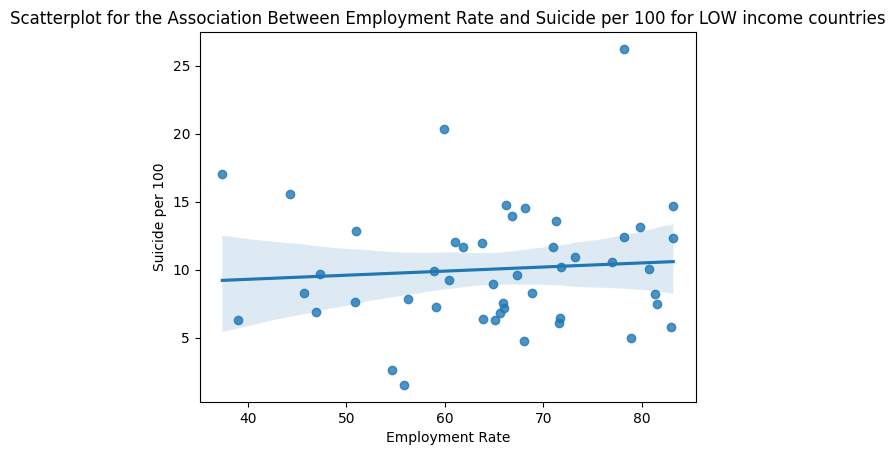

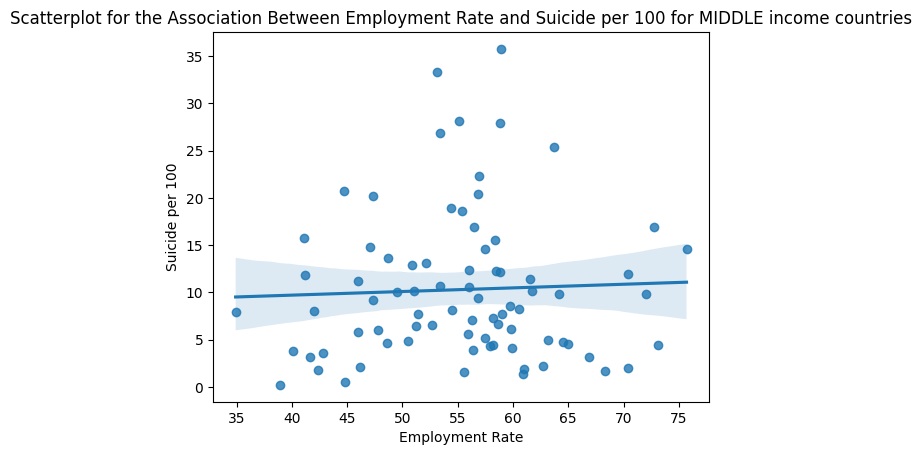

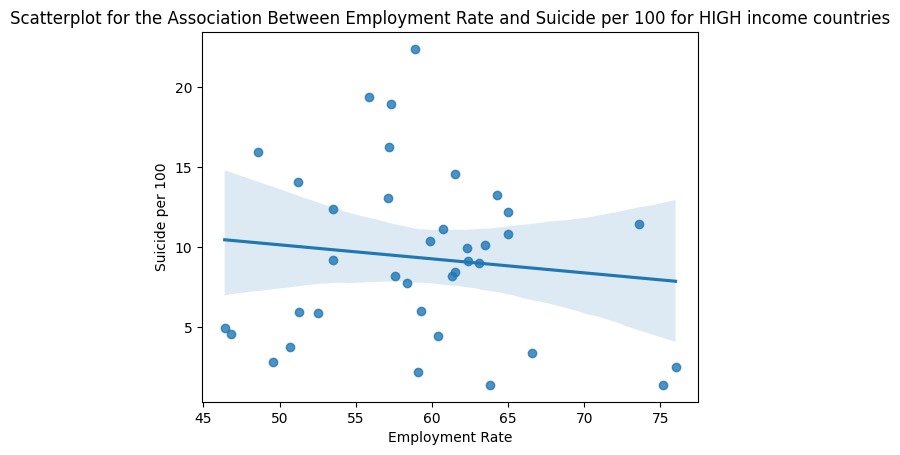




----------------------------------------------




In [9]:
#%%
scat1 = seaborn.regplot(x='employrate', y='suicideper100th', data=sub1)
plt.xlabel('Employment Rate')
plt.ylabel('Suicide per 100')
plt.title('Scatterplot for the Association Between Employment Rate and Suicide per 100 for LOW income countries')
plt.show()

#%%
scat2 = seaborn.regplot(x='employrate', y='suicideper100th', data=sub2)
plt.xlabel('Employment Rate')
plt.ylabel('Suicide per 100')
plt.title('Scatterplot for the Association Between Employment Rate and Suicide per 100 for MIDDLE income countries')
plt.show()

#%%
scat3 = seaborn.regplot(x='employrate', y='suicideper100th', data=sub3)
plt.xlabel('Employment Rate')
plt.ylabel('Suicide per 100')
plt.title('Scatterplot for the Association Between Employment Rate and Suicide per 100 for HIGH income countries')
plt.show()

print('\n\n')
print('----------------------------------------------\n\n')


Running pearson coefficient with income group as moderator.

- As we can see that the p values are very low, hence verifying that the income level has no relation with the association of employment rate and suicide rates and cannot be considered as a moderating variable.

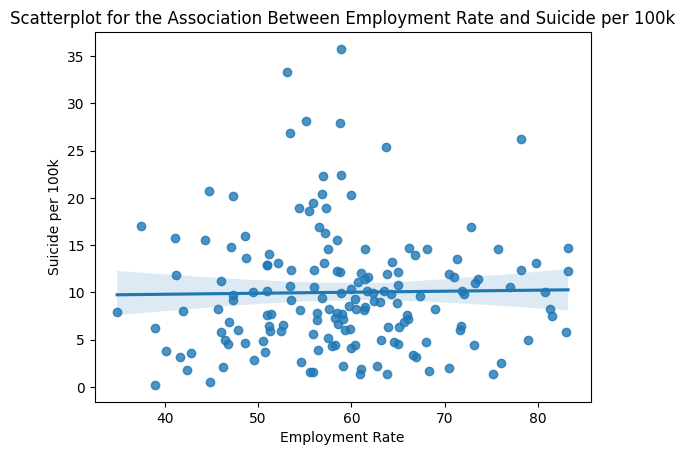

OLS regression model for the association between Employment Rate and Suicide per 100k
                            OLS Regression Results                            
Dep. Variable:        suicideper100th   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                   0.04952
Date:                Sat, 06 Jan 2024   Prob (F-statistic):              0.824
Time:                        20:16:40   Log-Likelihood:                -532.96
No. Observations:                 163   AIC:                             1070.
Df Residuals:                     161   BIC:                             1076.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

In [10]:
scat1 = seaborn.regplot(x="employrate", y="suicideper100th", scatter=True, data=data)
plt.xlabel('Employment Rate')
plt.ylabel('Suicide per 100k')
plt.title ('Scatterplot for the Association Between Employment Rate and Suicide per 100k')
plt.show()

print ("OLS regression model for the association between Employment Rate and Suicide per 100k")
reg1 = smf.ols('suicideper100th ~ employrate', data=data).fit()
print (reg1.summary())



In [11]:
data['employrate_c'] = (data['employrate'] - data['employrate'].mean())
data['incomeperperson_c'] = (data['incomeperperson'] - data['incomeperperson'].mean())
data[["employrate_c", "incomeperperson_c"]].describe()

# linear regression analysis
reg1 = smf.ols('suicideper100th ~ employrate_c', data=data).fit()
print (reg1.summary())

# quadratic (polynomial) regression analysis

reg2 = smf.ols('suicideper100th ~ employrate_c + I(employrate_c**2)', data=data).fit()
print (reg2.summary())


                            OLS Regression Results                            
Dep. Variable:        suicideper100th   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                   0.04952
Date:                Sat, 06 Jan 2024   Prob (F-statistic):              0.824
Time:                        20:16:40   Log-Likelihood:                -532.96
No. Observations:                 163   AIC:                             1070.
Df Residuals:                     161   BIC:                             1076.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       10.0010      0.502     19.938   

- As we can see the mean is equal to 0, meaning that we have correctly centered our data.
- The results of the linear regression model indicated that employment rate (Beta=0.049, p=0.824) was not associated with the suicides per 100k.
- For the sake of the assignment, We can derive that the equation of line is y=0.0108x+ 9.3611. 

####################################################################################
# EVALUATING MODEL FIT
####################################################################################

                            OLS Regression Results                            
Dep. Variable:        suicideper100th   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.3343
Date:                Sat, 06 Jan 2024   Prob (F-statistic):              0.801
Time:                        20:16:40   Log-Likelihood:                -532.48
No. Observations:                 163   AIC:                             1073.
Df Residuals:                     159   BIC:                             1085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               10.3821 

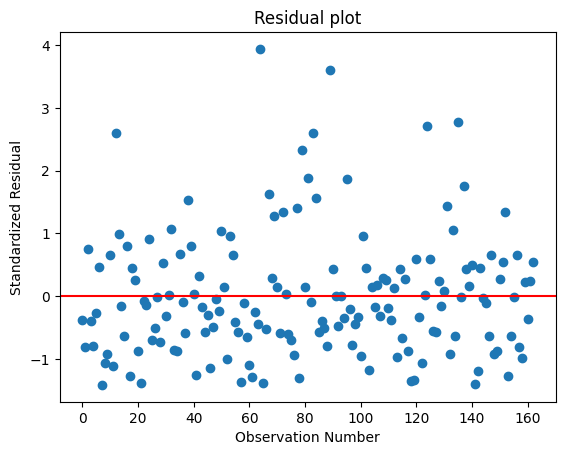

Figure(640x480)



----------------------------------------------




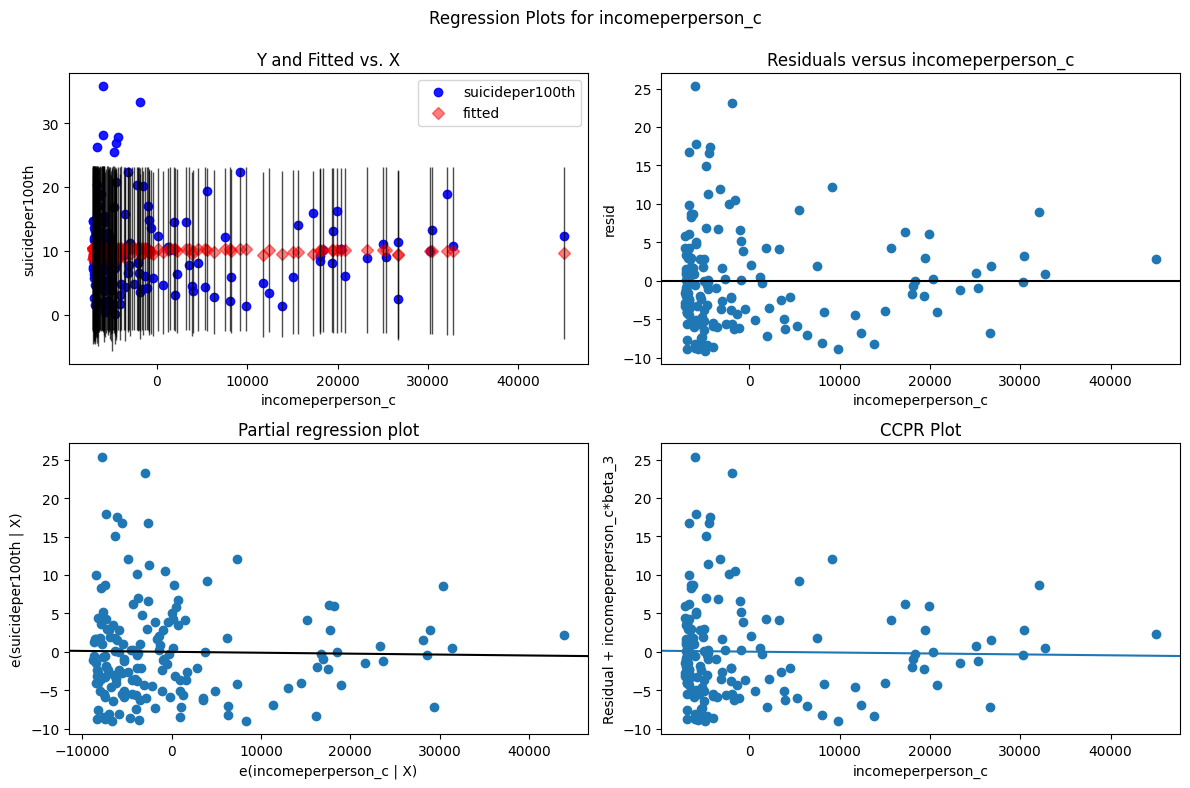

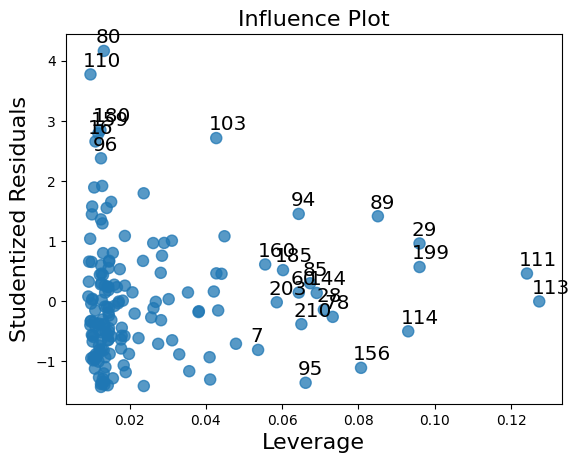

In [12]:
reg3 = smf.ols('suicideper100th  ~ employrate_c + I(employrate_c**2) + incomeperperson_c', 
               data=data).fit()
print (reg3.summary())


# simple plot of residuals
stdres=pandas.DataFrame(reg3.resid_pearson)
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')
plt.title('Residual plot')
plt.show()


# additional regression dia0gnostic plots
fig2 = plt.figure(figsize=(12,8))
fig2 = sm.graphics.plot_regress_exog(reg3,  "incomeperperson_c", fig=fig2)

# leverage plot
fig3=sm.graphics.influence_plot(reg3, size=8)
print(fig3)


print('\n\n')
print('----------------------------------------------\n\n') 

- P values for each is very high, so we cannot reject null hypothesis in any case. 

- Also,there is very little change in the association telling us the incomeperperson is not a confounding variable.

- But when we use degree 2, we can see that the association becomes stronger as the p value significantly decreases. 

Plots:

- As we see in our first plot, our model does not predict the values for extreme higher and lowers cases, hence, the high p value.

- The residual plot further tells us that the residuals are very far off and the plot is not normalized.

- The Influence plot shows that we have various outlier with high leverage.

##############################################################################
# LOGISTIC REGRESSION
##############################################################################

In [13]:
#Binning into two groups
d= data['suicideper100th'].mean()
def SUIMEAN (x):
    if x['suicideper100th'] > d :
        return 1
    else:
        return 0
def EMPMEAN (x):
    if x['employrate'] > data['employrate'].mean() :
        return 1
    else:
        return 0
    
def INCMEAN (x):
    if x['incomeperperson'] > data['incomeperperson'].mean() :
        return 1
    else:
        return 0
    
data['SUIMEAN'] = data.apply (lambda x: SUIMEAN(x),axis=1)
data['EMPMEAN'] = data.apply (lambda x: EMPMEAN(x),axis=1)
data['INCMEAN'] = data.apply (lambda x: INCMEAN(x),axis=1)



lreg1 = smf.logit(formula = 'SUIMEAN ~ EMPMEAN', data = data).fit()
print (lreg1.summary())
# odds ratios
print ("Odds Ratios")
print (numpy.exp(lreg1.params))

# odd ratios with 95% confidence intervals
params = lreg1.params
conf = lreg1.conf_int()
conf['OR'] = params
conf.columns = ['Lower CI', 'Upper CI', 'OR']
print (numpy.exp(conf))

lreg2 = smf.logit(formula = 'SUIMEAN ~ EMPMEAN + INCMEAN ', data = data).fit()
print (lreg2.summary())

# odd ratios with 95% confidence intervals
params = lreg2.params
conf = lreg2.conf_int()
conf['OR'] = params
conf.columns = ['Lower CI', 'Upper CI', 'OR']
print (numpy.exp(conf))



Optimization terminated successfully.
         Current function value: 0.684096
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                SUIMEAN   No. Observations:                  163
Model:                          Logit   Df Residuals:                      161
Method:                           MLE   Df Model:                            1
Date:                Sat, 06 Jan 2024   Pseudo R-squ.:                0.001064
Time:                        20:16:44   Log-Likelihood:                -111.51
converged:                       True   LL-Null:                       -111.63
Covariance Type:            nonrobust   LLR p-value:                    0.6260
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1866      0.217     -0.861      0.389      -0.611       0.238
EMPMEAN       -0.1543      0.

- I binned my quantitative explanatory variables into two groups of below mean and above mean. 

- None of my binned explanatory variables have statistically significant p values. 

- Even still, the odds ratio of empmean (0.85) shows that there are less suicides in below average income countries and that does not change when income variable is added. Which matches with my previous conclusion.